# Stream Gage vs. Sentinel-2 Workflow

This is the beginnings of our workflow to compare stream gage data (water volume) against satellite imagery (water area). The notebook runs through downloading NWIS data and Sentinel-2 data, as well as plotting areas of interest and their associate NDWI images and water pixel extraction and count. Each step of the workflow has been repeated for each area of interest, as we have not made an automated flow yet. The three sites of interest are Vicksburg, Mississippi, Yankton, South Dakota, and Pine River Arkansas. The variable names for each site reflect the location. 

To run this workflow, you must sign up for [Google Earth Engine](https://signup.earthengine.google.com/#!/), and enter an authentication code to initialize it. 

In [41]:
!pip install geemap

## Import Libraries


In [69]:
import hydrofunctions as hf
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import folium
import geemap.eefolium as geemap
import ee

%matplotlib inline

## Authenticate Google Earth Engine

In [ ]:
ee.Authenticate()
ee.Initialize()  

## Site Info for All Gage Sites

Specify the start and end time for time series as well as geographic region to process. This can be changed to river gages and time periods.

### Vicksburg, MS

In [43]:
#site number for NWIS gage (Vicksburg MS Site)
vicksburg = ['07289000']

#Coordinates for the bounds of a rectangle at Vicksburg MS
vicksburg_xMin = -91.2
vicksburg_yMin = 32
vicksburg_xMax = -90.8
vicksburg_yMax = 32.7

# Vicksburg MS wet and dry seasons
vicksburg_wet_season_start = '2019-03-15'
vicksburg_wet_season_end = '2019-05-01'

vicksburg_dry_season_start = '2019-9-01'
vicksburg_dry_season_end = '2019-10-01'

### Yankton, SD

In [44]:
#site number for NWIS gage (Yankton SD Site)
yankton = ['06467500']

#Coordinates for the bounds of a rectangle at Yankton SD (Gavins Point)
yankton_xMin = -97.7
yankton_yMin = 42.2
yankton_xMax = -97.3
yankton_yMax = 43.2

# Yankton SD wet and dry seasons
yankton_wet_season_start = '2021-05-02'
yankton_wet_season_end = '2021-08-01'

yankton_dry_season_start = '2021-02-01'
yankton_dry_season_end = '2021-05-01'

### Pine Bluff, AR

In [45]:
#site number for NWIS gage (Pine Bluff AR Site)
pineBluff = ['07263650']

#Coordinates for the bounds of a rectangle at Pine Bluff AR
pineBluff_xMin = -92.4
pineBluff_yMin = 34
pineBluff_xMax = -91.7
pineBluff_yMax = 34.4

# Pine Bluff AR wet and dry seasons
pineBluff_wet_season_start = '2019-05-15'
pineBluff_wet_season_end = '2019-06-15'

pineBluff_dry_season_start = '2019-09-01'
pineBluff_dry_season_end = '2019-12-01'

***

## Create map centered around AOI

### Vicksburg, MS

In [46]:
Map = geemap.Map(center=[32.3,-90.9], zoom= 11)
Map

### Yankton, SD

In [47]:
Map_gp = geemap.Map(center=[42.8,-97.5], zoom= 11)
Map_gp

### Pine Bluff, AR

In [48]:
Map_ar = geemap.Map(center=[34.2,-92], zoom= 11)
Map_ar

***


## Use Google Earth Engine to extract Sentinel-2 collection for time period and area of interest

In [49]:
# Import the Sentinel 2 collection as sentinel 2
sentinel2 = ee.ImageCollection('COPERNICUS/S2_SR').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))

#Vicksburg geometry
vicksburg_rectangleGeoJSON = ee.Geometry.Rectangle(
  [
    [vicksburg_xMin, vicksburg_yMin],
    [vicksburg_xMax, vicksburg_yMax]   # max x and y
  ]
)

#Yankton geometry
yankton_rectangleGeoJSON = ee.Geometry.Rectangle(
  [
    [yankton_xMin, yankton_yMin],
    [yankton_xMax, yankton_yMax]   # max x and y
  ]
)

#Pine Bluff geometry
pineBluff_rectangleGeoJSON = ee.Geometry.Rectangle(
  [
    [pineBluff_xMin, pineBluff_yMin],
    [pineBluff_xMax, pineBluff_yMax]   # max x and y
  ]
)


# Palettes for Visualization
trueColor_palette = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000};
waterPalette = ['red', 'yellow', 'green', 'blue'];



### Vicksburg, MS

In [50]:
vicksburg_bnds = ee.FeatureCollection([
    ee.Feature(
        vicksburg_rectangleGeoJSON,
        {'name': 'Mississippi Vicksburg', 'fill': 1}),
    ])

dry_season = sentinel2.filterBounds(vicksburg_bnds).filterDate(vicksburg_dry_season_start, vicksburg_dry_season_end).mosaic().clip(vicksburg_bnds)
wet_season = sentinel2.filterBounds(vicksburg_bnds).filterDate(vicksburg_wet_season_start, vicksburg_wet_season_end).mosaic().clip(vicksburg_bnds)


### Display Earth Engine True Color Images layers in Dry Season - Vicksburg MS

In [51]:
Map = geemap.Map(center=[32.3,-90.9], zoom= 12)
Map.addLayer(dry_season, trueColor_palette, '2019 Dry season true color');
Map.addLayerControl()
Map

### Display Earth Engine True Color Images layers in Wet Season

In [52]:
Map = geemap.Map(center=[32.3,-90.9], zoom= 12)
Map.addLayer(wet_season, trueColor_palette, '2019 Wet season true color');
Map.addLayerControl()
Map

### GEE Script for Yankton SD

In [53]:
yankton_bnds = ee.FeatureCollection([
    ee.Feature(
        yankton_rectangleGeoJSON,
        {'name': 'South Dakota Yankton', 'fill': 1}),
    ])

dry_season_gp = sentinel2.filterBounds(yankton_bnds).filterDate(yankton_dry_season_start, yankton_dry_season_end).mosaic().clip(yankton_bnds)
wet_season_gp = sentinel2.filterBounds(yankton_bnds).filterDate(yankton_wet_season_start, yankton_wet_season_end).mosaic().clip(yankton_bnds)

### Display Earth Engine True Color Images layers in Dry Season - Yankton SD

In [54]:
Map = geemap.Map(center=[42.8,-97.5], zoom= 11)
Map.addLayer(dry_season_gp, trueColor_palette, '2019 Dry season true color');
Map.addLayerControl()
Map

### Display Earth Engine True Color Images layers in Wet Season - Yankton SD

In [55]:
Map = geemap.Map(center=[42.8,-97.5], zoom= 11)
Map.addLayer(wet_season_gp, trueColor_palette, '2019 Wet season true color');
Map.addLayerControl()
Map

### GEE Script for Pine Bluff AR

In [56]:
# Import the Sentinel 2 collection as sentinel 2

pineBluff_bnds = ee.FeatureCollection([
    ee.Feature(
        pineBluff_rectangleGeoJSON,
        {'name': 'Pine Bluff, AR', 'fill': 1}),
    ])

dry_season_ar = sentinel2.filterBounds(pineBluff_bnds).filterDate(pineBluff_dry_season_start, pineBluff_dry_season_end).mosaic().clip(pineBluff_bnds)
wet_season_ar = sentinel2.filterBounds(pineBluff_bnds).filterDate(pineBluff_wet_season_start, pineBluff_wet_season_end).mosaic().clip(pineBluff_bnds)


### Display Earth Engine True Color Images layers in Dry Season - Pine Bluff AR

In [57]:
Map = geemap.Map(center=[34.2,-92], zoom= 11)
Map.addLayer(dry_season_ar, trueColor_palette, '2019 Dry season true color');
Map.addLayerControl()
Map

### Display Earth Engine True Color Images layers in Wet Season - Pine Bluff AR

In [58]:
Map = geemap.Map(center=[34.2,-92], zoom= 11)
Map.addLayer(wet_season_ar, trueColor_palette, '2019 Wet season true color');
Map.addLayerControl()
Map

***

## Extract NWIS data

Some locations have just stream gage data, others just have gage height data, and both could return interesting results. We're hoping to compare and contrast the two ultimately. The two functions below extract stream gage data and gage height data respectively.

In [59]:
#function that finds stream gage data for any given site and time frame
def create_stream_gage_df(site, start, end):
    """Imports data to dataframe, adds geolocation and stream gage site name

    Parameters
    ----------
    site : string
        Site number as specified by USGS
        
    start : string
        Desired start date for data
        
    end : string
        Desired end date for data 

    Returns
    -------
    response_df : dataframe
        Dataframe created from downloaded csv    """

    
    # Generate dataframe from NWIS for gage discharge data at specified sites
    response = hf.NWIS(site, 'dv', start, end, parameterCd='00060')
    response_df = response.df()

    # Rename columns for discharge and flags
    response_df.columns = ('discharge', 'qualifiers')
    
    # Add column for site name
    response_df["sitename"] = hf.get_nwis_property(response.json, key='siteName')[0]
   
    # Add columns for gage location latitude and longitude
    geolocation =   hf.get_nwis_property(response.json, key='geoLocation')[0]
    response_df["latitude"] = geolocation["geogLocation"]["latitude"]
    response_df["longitude"] = geolocation["geogLocation"]["longitude"]

    
    return response_df

#function that finds stream gage height data for any given site and time frame
def create_df_gageht(site, start, end):
    """Imports data to dataframe, adds geolocation and stream gage site name

    Parameters
    ----------
    site : string
        Site number as specified by USGS
        
    start : string
        Desired start date for data
        
    end : string
        Desired end date for data 

    Returns
    -------
    response_df : dataframe
        Dataframe created from downloaded csv    """
    
    # YOUR CODE HERE
    
    # Generate dataframe from NWIS for gage discharge data at specified sites
    response = hf.NWIS(site, 'dv', start, end, parameterCd='00065')
    response_df = response.df()

    # Rename columns for discharge and flags
    response_df.columns = ('gage ht', 'qualifiers')
    
    # Add column for site name
   # response_df["sitename"] = hf.get_nwis_property(response.json, key='siteName')[0]
   
    # Add columns for gage location latitude and longitude
    #geolocation =   hf.get_nwis_property(response.json, key='geoLocation')[0]
    #response_df["latitude"] = geolocation["geogLocation"]["latitude"]
    #response_df["longitude"] = geolocation["geogLocation"]["longitude"]

    
    return response_df


### Extract & plot data from NWIS site - Vicksburg MS

In [60]:
site_df = create_stream_gage_df(vicksburg, vicksburg_wet_season_start, vicksburg_wet_season_end)
site_df 

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=07289000&parameterCd=00060&startDT=2019-03-15&endDT=2019-05-01


,discharge,qualifiers,sitename,latitude,longitude
datetimeUTC,,,,,
2019-03-15 00:00:00+00:00,1870000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-16 00:00:00+00:00,1870000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-17 00:00:00+00:00,1870000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-18 00:00:00+00:00,1860000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-19 00:00:00+00:00,1860000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-20 00:00:00+00:00,1860000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-21 00:00:00+00:00,1850000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-22 00:00:00+00:00,1850000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-03-23 00:00:00+00:00,1840000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833


[Text(0.5, 0, 'Date (Month-Day)'),
 Text(0, 0.5, 'Daily Mean Stream Discharge \n (cu. ft. / second)')]

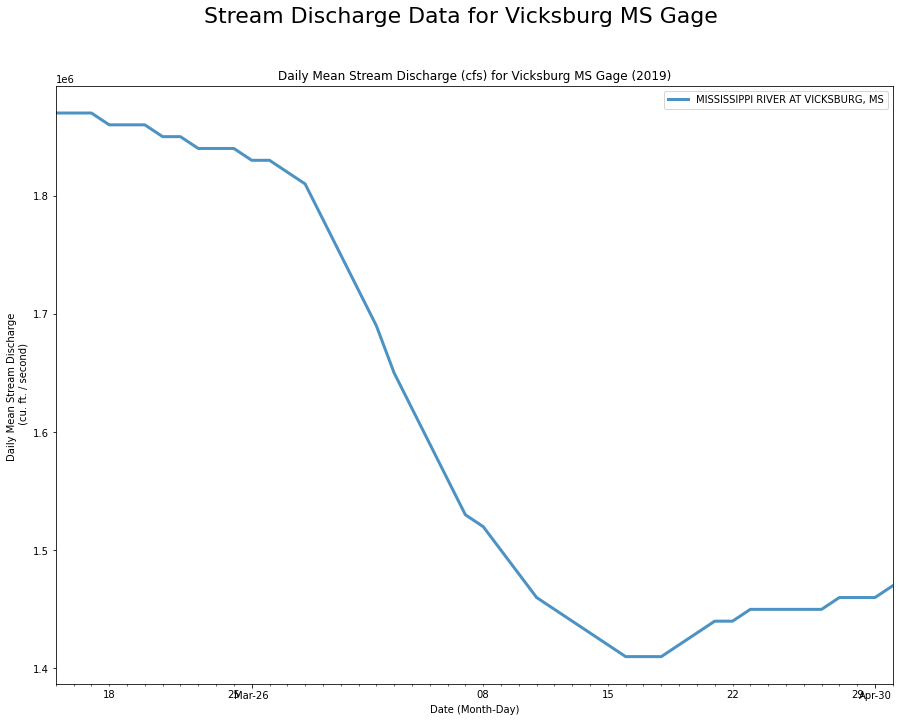

In [70]:
# Define plot space, overall size and title
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 11))

fig.suptitle(
    "Stream Discharge Data for Vicksburg MS Gage", fontsize=22)

# Loop for plotting Subplot 1
for site_name, group in site_df.groupby('sitename'):
    group.groupby('sitename').plot(y='discharge',
                                   title="Daily Mean Stream Discharge (cfs) for Vicksburg MS Gage (2019)",
                                   label=site_name,
                                   linewidth=3.0,
                                   ax=ax1,
                                   alpha=.8)

# Define the date format for Subplot 1, set axis labels
date_form = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
ax1.set(xlabel="Date (Month-Day)",
        ylabel="Daily Mean Stream Discharge \n (cu. ft. / second)")

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})

### Extract & plot data from NWIS site - Yankton SD

In [71]:
site_df_gp = create_df_gageht(yankton, yankton_dry_season_start, yankton_wet_season_end)
site_df_gp

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06467500&parameterCd=00065&startDT=2021-02-01&endDT=2021-08-01


,gage ht,qualifiers
datetimeUTC,,
2021-02-01 00:00:00+00:00,9.57,A
2021-02-02 00:00:00+00:00,9.50,A
2021-02-03 00:00:00+00:00,9.56,A
2021-02-04 00:00:00+00:00,9.57,A
2021-02-05 00:00:00+00:00,9.77,A
...,...,...
2021-07-28 00:00:00+00:00,11.44,A
2021-07-29 00:00:00+00:00,11.46,A
2021-07-30 00:00:00+00:00,11.44,A


[Text(0.5, 0, 'Date (Month-Day)'),
 Text(0, 0.5, 'Daily Mean Gage Height \n (ft)')]

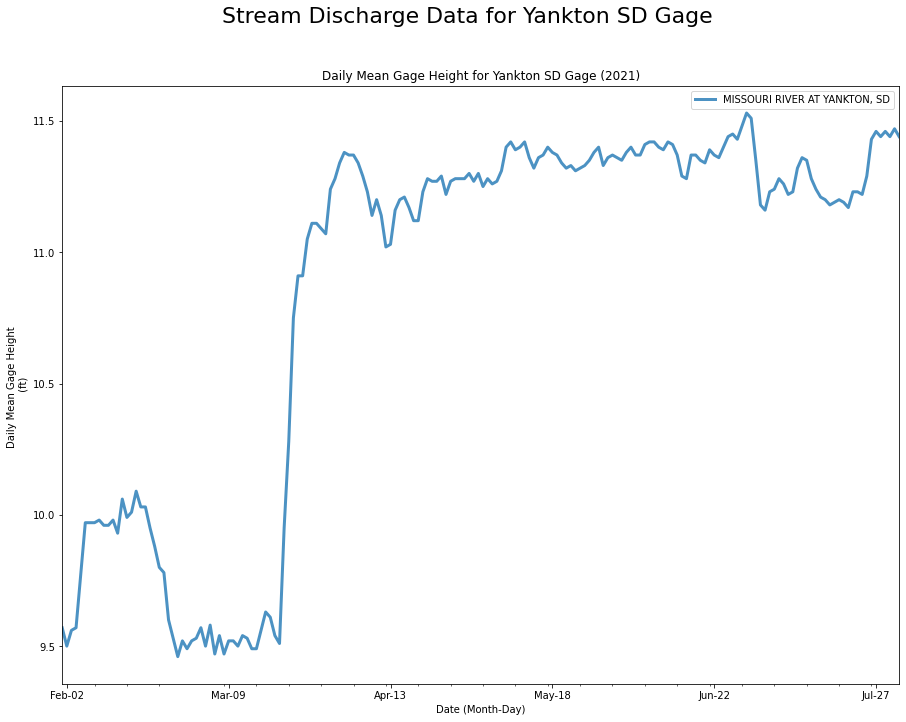

In [72]:
# Define plot space, overall size and title
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 11))

fig.suptitle(
    "Stream Discharge Data for Yankton SD Gage", fontsize=22)

# Loop for plotting Subplot 1
site_df_gp.plot(y='gage ht',
                title="Daily Mean Gage Height for Yankton SD Gage (2021)",
                label='MISSOURI RIVER AT YANKTON, SD',
                linewidth=3.0,
                ax=ax1,
                alpha=.8)

# Define the date format for Subplot 1, set axis labels
date_form = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
ax1.set(xlabel="Date (Month-Day)",
        ylabel="Daily Mean Gage Height \n (ft)")

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})

### Extract & plot data from NWIS site - Pine Bluff AR

In [73]:
site_df_ar = create_df_gageht(pineBluff, pineBluff_wet_season_start, pineBluff_dry_season_end)
site_df_ar

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=07263650&parameterCd=00065&startDT=2019-05-15&endDT=2019-12-01


,gage ht,qualifiers
datetimeUTC,,
2019-05-15 00:00:00+00:00,37.14,A
2019-05-16 00:00:00+00:00,36.94,A
2019-05-17 00:00:00+00:00,36.23,A
2019-05-18 00:00:00+00:00,35.73,A
2019-05-19 00:00:00+00:00,35.72,A
...,...,...
2019-11-27 00:00:00+00:00,31.56,A
2019-11-28 00:00:00+00:00,31.47,A
2019-11-29 00:00:00+00:00,31.53,A


[Text(0.5, 0, 'Date (Month-Day)'),
 Text(0, 0.5, 'Daily Mean Gage Height \n (ft)')]

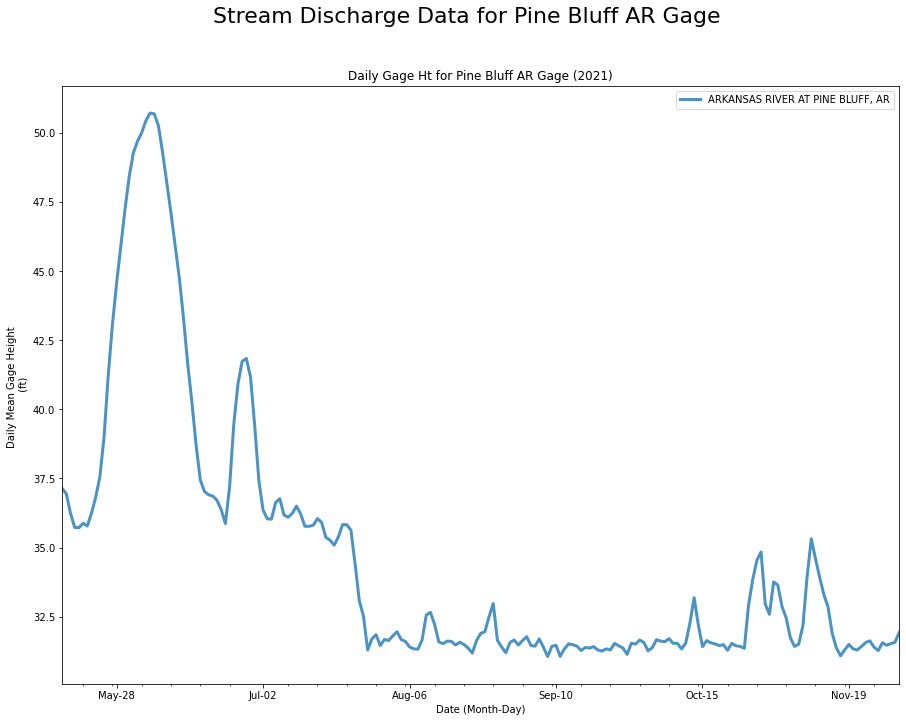

In [74]:
# Define plot space, overall size and title
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 11))

fig.suptitle(
    "Stream Discharge Data for Pine Bluff AR Gage", fontsize=22)

# Loop for plotting Subplot 1
site_df_ar.plot(y='gage ht',
                title="Daily Gage Ht for Pine Bluff AR Gage (2021)",
                label='ARKANSAS RIVER AT PINE BLUFF, AR',
                linewidth=3.0,
                ax=ax1,
                alpha=.8)

# Define the date format for Subplot 1, set axis labels
date_form = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
ax1.set(xlabel="Date (Month-Day)",
        ylabel="Daily Mean Gage Height \n (ft)")

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})

***

## NDWI Analysis

### Vicksburg NDWI Images in Dry Season

In [75]:
dry_season_Map = geemap.Map(center=[32.3,-90.9], zoom= 11)
vicksburg_ndwi_dry = dry_season.normalizedDifference(['B3', 'B8']);
dry_season_Map.addLayer(vicksburg_ndwi_dry, {'min': -1, 'max': 0.5, 'palette': waterPalette}, '2019 Wet season NDWI');
dry_season_Map

### Vicksburg NDWI Images in Wet Season

In [76]:
wet_season_Map = geemap.Map(center=[32.3,-90.9], zoom= 11)
vicksburg_ndwi_wet = wet_season.normalizedDifference(['B3', 'B8']);
wet_season_Map.addLayer(vicksburg_ndwi_wet, {'min': -1, 'max': 0.5, 'palette': waterPalette}, '2019 Wet season NDWI');
wet_season_Map

### Yankton NDWI Images in Dry Season

In [77]:
dry_season_Map_gp = geemap.Map(center=[42.8,-97.5], zoom= 11)
yankton_ndwi_dry = dry_season_gp.normalizedDifference(['B3', 'B8']);
dry_season_Map_gp.addLayer(yankton_ndwi_dry, {'min': -1, 'max': 0.5, 'palette': waterPalette}, '2021 Dry season NDWI');
dry_season_Map_gp

### Yankton NDWI Images in Wet Season

In [78]:
wet_season_Map_gp = geemap.Map(center=[42.8,-97.5], zoom= 11)
yankton_ndwi_wet = wet_season_gp.normalizedDifference(['B3', 'B8']);
wet_season_Map_gp.addLayer(yankton_ndwi_wet, {'min': -1, 'max': 0.5, 'palette': waterPalette}, '2021 Wet season NDWI');
wet_season_Map_gp

### Pine Bluff NDWI Images in Dry Season

In [79]:
dry_season_Map_ar = geemap.Map(center=[34.2,-92], zoom= 11)
pineBluff_ndwi_dry = dry_season_ar.normalizedDifference(['B3', 'B8']);
dry_season_Map_ar.addLayer(pineBluff_ndwi_dry, {'min': -1, 'max': 0.5, 'palette': waterPalette}, '2019 Dry season NDWI');
dry_season_Map_ar

### Pine Bluff NDWI Images in Wet Season

In [80]:
wet_season_Map_ar = geemap.Map(center=[34.2,-92], zoom= 11)
pineBluff_ndwi_wet = wet_season_ar.normalizedDifference(['B3', 'B8']);
wet_season_Map_ar.addLayer(pineBluff_ndwi_wet, {'min': -1, 'max': 0.5, 'palette': waterPalette}, '2019 Wet season NDWI');
wet_season_Map_ar

***

## Extract Water Pixels

### Wet season water extent in Vicksburg

In [81]:
vicksburg_wet_season_Map = geemap.Map(center=[32.3,-90.9], zoom= 11)

ndwi_threshold = 0
vicksburg_wet_season_image = vicksburg_ndwi_wet.gt(ndwi_threshold).selfMask()

vicksburg_wet_season_Map.addLayer(vicksburg_wet_season_image, {'palette': 'blue'}, 'Water image')
vicksburg_wet_season_Map

### Dry season water extent in Vicksburg

In [82]:
vicksburg_dry_season_Map = geemap.Map(center=[32.3,-90.9], zoom= 11)

ndwi_threshold = 0
vicksburg_dry_season_image = vicksburg_ndwi_dry.gt(ndwi_threshold).selfMask()

vicksburg_dry_season_Map.addLayer(vicksburg_dry_season_image, {'palette': 'blue'}, 'Water image')
vicksburg_dry_season_Map

### Wet season water extent in Yankton

In [83]:
yankton_wet_season_Map = geemap.Map(center=[42.8,-97.5], zoom= 11)

ndwi_threshold_gp = 0
yankton_wet_season_image = yankton_ndwi_wet.gt(ndwi_threshold_gp).selfMask()

yankton_wet_season_Map.addLayer(yankton_wet_season_image, {'palette': 'blue'}, 'Water image')
yankton_wet_season_Map



### Dry season water extent in Yankton


In [84]:
yankton_dry_season_Map = geemap.Map(center=[42.8,-97.5], zoom= 11)

ndwi_threshold_gp = 0
yankton_dry_season_image = yankton_ndwi_dry.gt(ndwi_threshold_gp).selfMask()

yankton_dry_season_Map.addLayer(yankton_dry_season_image, {'palette': 'blue'}, 'Water image')
yankton_dry_season_Map

### Wet season water extent in Pine Bluff


In [85]:
pineBluff_wet_season_Map = geemap.Map(center=[34.2,-92], zoom= 11)

ndwi_threshold_ar = 0
pineBluff_wet_season_image = pineBluff_ndwi_wet.gt(ndwi_threshold_ar).selfMask()

pineBluff_wet_season_Map.addLayer(pineBluff_wet_season_image, {'palette': 'blue'}, 'Water image')
pineBluff_wet_season_Map


### Dry season water extent in Pine Bluff

In [86]:
pineBluff_dry_season_Map = geemap.Map(center=[34.2,-92], zoom= 11)

ndwi_threshold_ar = 0
pineBluff_dry_season_image = pineBluff_ndwi_dry.gt(ndwi_threshold_ar).selfMask()

pineBluff_dry_season_Map.addLayer(pineBluff_dry_season_image, {'palette': 'blue'}, 'Water image')
pineBluff_dry_season_Map

***

## Count Water Pixels

### Count water pixels for Vicksburg

In [87]:
# Reduce the region. The region parameter is the Feature geometry.
vicksburg_count_pixels_wet = vicksburg_wet_season_image.reduceRegion(**{
  'reducer': ee.Reducer.count(),
  'geometry': vicksburg_bnds.geometry(),
  'scale': 10,
  'maxPixels': 1e9
})

# Reduce the region. The region parameter is the Feature geometry.
vicksburg_count_pixels_dry = vicksburg_dry_season_image.reduceRegion(**{
  'reducer': ee.Reducer.count(),
  'geometry': vicksburg_bnds.geometry(),
  'scale': 10,
  'maxPixels': 1e9
})

# The result is a Dictionary.  Print it.
print("Vicksburg water pixel count in the wet season: ", vicksburg_count_pixels_wet.getInfo())
print("Vicksburg water pixel count in the dry season: ", vicksburg_count_pixels_dry.getInfo())

Vicksburg water pixel count in the wet season:  {'nd': 7168558}
Vicksburg water pixel count in the dry season:  {'nd': 2668216}


### Count water pixels for Yankton

In [88]:
# Reduce the region. The region parameter is the Feature geometry.
yankton_count_pixels_wet = yankton_wet_season_image.reduceRegion(**{
  'reducer': ee.Reducer.count(),
  'geometry': yankton_bnds.geometry(),
  'scale': 10,
  'maxPixels': 1e9
})

# Reduce the region. The region parameter is the Feature geometry.
yankton_count_pixels_dry = yankton_dry_season_image.reduceRegion(**{
  'reducer': ee.Reducer.count(),
  'geometry': yankton_bnds.geometry(),
  'scale': 10,
  'maxPixels': 1e9
})

# The result is a Dictionary.  Print it.
print("Yankton water pixel count in the wet season: ", yankton_count_pixels_wet.getInfo())
print("Yankton water pixel count in the dry season: ", yankton_count_pixels_dry.getInfo())

Yankton water pixel count in the wet season:  {'nd': 939300}
Yankton water pixel count in the dry season:  {'nd': 895931}


### Count water pixels for Pine Bluff

In [89]:
# Reduce the region. The region parameter is the Feature geometry.
pineBluff_count_pixels_wet = pineBluff_wet_season_image.reduceRegion(**{
  'reducer': ee.Reducer.count(),
  'geometry': pineBluff_bnds.geometry(),
  'scale': 10,
  'maxPixels': 1e9
})

# Reduce the region. The region parameter is the Feature geometry.
pineBluff_count_pixels_dry = pineBluff_dry_season_image.reduceRegion(**{
  'reducer': ee.Reducer.count(),
  'geometry': pineBluff_bnds.geometry(),
  'scale': 10,
  'maxPixels': 1e9
})

# The result is a Dictionary.  Print it.
print("Yankton water pixel count in the wet season: ", pineBluff_count_pixels_wet.getInfo())
print("Yankton water pixel count in the dry season: ", pineBluff_count_pixels_dry.getInfo())

Yankton water pixel count in the wet season:  {'nd': 857159}
Yankton water pixel count in the dry season:  {'nd': 690287}


***

## Future Work

- Animations/side-by-side comparisons in geemap
- Automate the process
- Add function that extracts monthly max discharge value